In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
sp_data = pd.read_csv('SP500.csv')

# Convert exchange rate to a number, with coersion to throw NA's if conversion not possible
sp_data['price'] = pd.to_numeric(sp_data.SP500, errors='coerce')

# Remove NA's
sp_data.dropna(inplace=True)

In [5]:
sp_data.head()

,DATE,SP500,price
0,2008-09-25,1209.18,1209.18
1,2008-09-26,1213.01,1213.01
2,2008-09-29,1106.39,1106.39
3,2008-09-30,1166.36,1166.36
4,2008-10-01,1161.06,1161.06


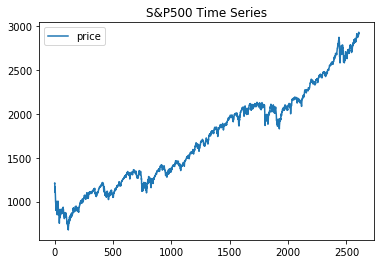

In [6]:
sp_data.plot()
plt.title('S&P500 Time Series')
plt.show()

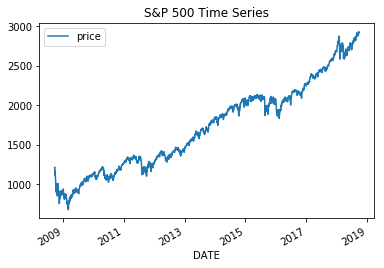

In [7]:
sp_data.index = pd.to_datetime(sp_data.DATE)
sp_data.plot()
plt.title('S&P 500 Time Series')
plt.show()

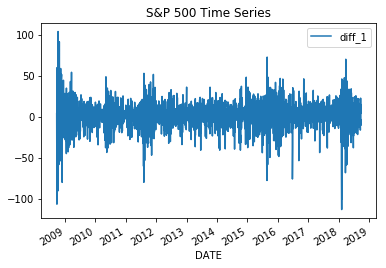

In [8]:
sp_data['diff_1'] = sp_data.price - sp_data.price.shift()
sp_data.plot(y='diff_1')
plt.title('S&P 500 Time Series')
plt.show()

Text(0.5,1,'S&P PACF')

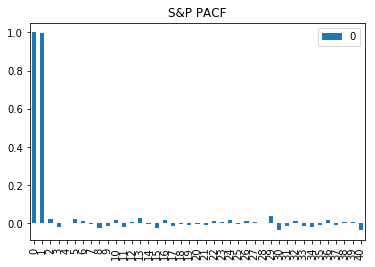

In [9]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(sp_data.price))
x_acf.plot(kind='bar')
plt.title("S&P PACF")

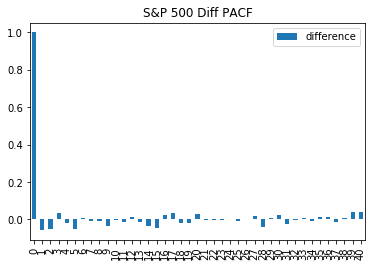

In [10]:
x_acf = pd.DataFrame(pacf(sp_data.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("S&P 500 Diff PACF")
plt.legend(['difference'])

# Building Models

In [11]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(sp_data.price, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 2517
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -10648.471
Method:                           css   S.D. of innovations             16.638
Date:                Wed, 26 Sep 2018   AIC                          21300.941
Time:                        19:38:28   BIC                          21312.603
Sample:                             1   HQIC                         21305.174
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6779      0.332      2.044      0.041       0.028       1.328
Residuals Description
count    2.517000e+03
mean    -1.276514e-14
std      1.664118e+01
min     -1.138679e+02
25%     -6.947942e+00

C:\Users\nu\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\nu\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [12]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(sp_data.price, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                 2518
Model:                     ARMA(1, 0)   Log Likelihood              -10658.545
Method:                       css-mle   S.D. of innovations             16.651
Date:                Wed, 26 Sep 2018   AIC                          21323.090
Time:                        19:38:33   BIC                          21340.583
Sample:                             0   HQIC                         21329.438
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2023.0133    701.503      2.884      0.004     648.093    3397.934
ar.L1.price     0.9998      0.000   3597.377      0.000       0.999       1.000
                                    Roots       

C:\Users\nu\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [13]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(sp_data.price, order=(1,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

C:\Users\nu\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

In [14]:
from statsmodels.tsa.arima_model import ARIMA
model_111 = ARIMA(sp_data.price, order=(1,1,1))
model_111_fit = model_111.fit()
print(model_111_fit.summary())
print('Residuals Description')
print(model_111_fit.resid.describe())

C:\Users\nu\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\nu\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 2517
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10641.337
Method:                       css-mle   S.D. of innovations             16.591
Date:                Wed, 26 Sep 2018   AIC                          21290.674
Time:                        19:38:55   BIC                          21313.997
Sample:                             1   HQIC                         21299.139
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6911      0.250      2.760      0.006       0.200       1.182
ar.L1.D.price     0.8211      0.104      7.928      0.000       0.618       1.024
ma.L1.D.price    -0.8648      0.092     

In [15]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(sp_data.price, order=(5,1,5))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

C:\Users\nu\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\nu\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\nu\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 2517
Model:                 ARIMA(5, 1, 5)   Log Likelihood              -10624.323
Method:                       css-mle   S.D. of innovations             16.464
Date:                Wed, 26 Sep 2018   AIC                          21272.646
Time:                        19:39:18   BIC                          21342.616
Sample:                             1   HQIC                         21298.040
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6953      0.240      2.901      0.004       0.226       1.165
ar.L1.D.price     0.6737      0.077      8.727      0.000       0.522       0.825
ar.L2.D.price    -1.5376      0.033    -

# Residuals

Text(0.5,1,'Histogram of Residuals')

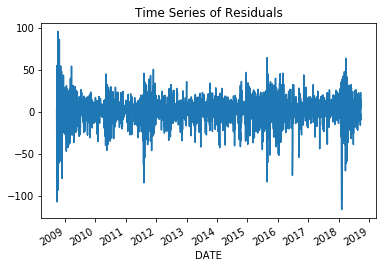

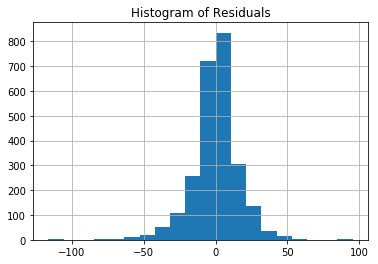

In [17]:
residuals = pd.DataFrame(model_111_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')